## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = study_results.merge(mouse_metadata, on="Mouse ID")
# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].unique()
count_of_mice = len(unique_mice)
count_of_mice

249

In [3]:
merged_data["Mouse ID"].nunique()

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = merged_data.duplicated(subset = ["Mouse ID", "Timepoint"])

merged_data['dupes'] = dupes
merged_data.loc[merged_data.dupes == True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),dupes
861,g989,0,45.000000,0,Propriva,Female,21,26,True
863,g989,5,47.570392,0,Propriva,Female,21,26,True
865,g989,10,49.880528,0,Propriva,Female,21,26,True
867,g989,15,53.442020,0,Propriva,Female,21,26,True
869,g989,20,54.657650,1,Propriva,Female,21,26,True


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
bad = merged_data.loc[merged_data["Mouse ID"] == "g989"]
bad

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),dupes
860,g989,0,45.000000,0,Propriva,Female,21,26,False
861,g989,0,45.000000,0,Propriva,Female,21,26,True
862,g989,5,48.786801,0,Propriva,Female,21,26,False
863,g989,5,47.570392,0,Propriva,Female,21,26,True
864,g989,10,51.745156,0,Propriva,Female,21,26,False
865,g989,10,49.880528,0,Propriva,Female,21,26,True
866,g989,15,51.325852,1,Propriva,Female,21,26,False
867,g989,15,53.442020,0,Propriva,Female,21,26,True
868,g989,20,55.326122,1,Propriva,Female,21,26,False
869,g989,20,54.657650,1,Propriva,Female,21,26,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = merged_data[merged_data["Mouse ID"] != 'g989']
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),dupes
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
1,b128,5,45.651331,0,Capomulin,Female,9,22,False
2,b128,10,43.270852,0,Capomulin,Female,9,22,False
3,b128,15,43.784893,0,Capomulin,Female,9,22,False
4,b128,20,42.731552,0,Capomulin,Female,9,22,False


In [7]:
# Checking the number of mice in the clean DataFrame.

clean_data["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
rvmean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
rvmedian = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
rvvar = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
rvstd = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
rvsem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

rvsem
# Assemble the resulting series into a single summary dataframe.

rv_df = pd.DataFrame({'Mean': rvmean, 
                      'Median': rvmedian, 
                      'Variance': rvvar, 
                      'Std. Dev': rvstd, 
                      'SEM': rvsem})
rv_df

,Mean,Median,Variance,Std. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_data.groupby(["Drug Regimen"]).agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

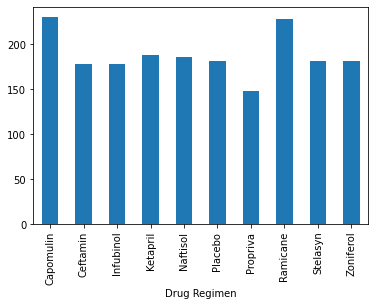

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

x = clean_data.groupby("Drug Regimen").size()
x.plot(kind='bar')
plt.show()

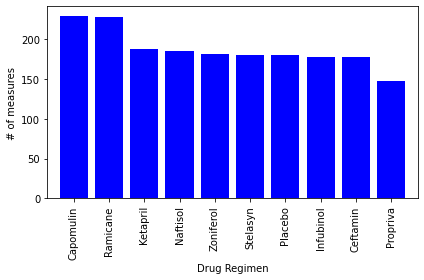

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
source = clean_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(source))
x_ticks = []
for key in source.keys():
    x_ticks.append(key)
y_values = source.tolist()
plt.bar(x_axis, y_values, color='b', align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_ticks, rotation = 90)
plt.xlabel("Drug Regimen")
plt.ylabel('# of measures')
plt.xlim(-0.75, len(x_axis)-0.25)
plt.tight_layout()
plt.show()
#note: Drugs not in alphabetical order here. How do I change this? If I sort xticks, I only move the ticks (and so they aren't lined up with data)

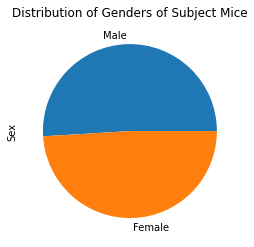

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
source_gender = clean_data["Sex"].value_counts()
source_gender.plot.pie(title="Distribution of Genders of Subject Mice")
plt.show()
#note: how do I rotate, remove y label, insert %s like below?

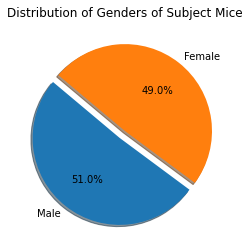

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


genders = source_gender.index.tolist()
gender_counts = source_gender.values.tolist()
explode = (0.1, 0.0)
plt.pie(gender_counts, explode=explode, labels=genders,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Distribution of Genders of Subject Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# lt = clean_data.sort_values(["Mouse ID", "Drug Regimen", "Timepoint"])
# lt = lt.set_index("Mouse ID")
lt_group = clean_data.groupby(["Mouse ID", "Drug Regimen"])
mouse_frame = clean_data.set_index("Mouse ID")
lt_max = lt_group["Timepoint"].max()

lt_max.reset_index()
lt_max_df = pd.DataFrame(lt_max)
merged = lt_max_df.merge(mouse_frame,how='left', left_on='Mouse ID', right_on='Mouse ID')
merged_filtered = merged.loc[merged["Timepoint_x"]==merged["Timepoint_y"]]
final_tumor = merged_filtered[['Timepoint_x', 'Drug Regimen', 'Weight (g)', 'Tumor Volume (mm3)']].copy()
final_tumor
# rows= []
# for index, value in lt_max.items():
#      row = index[0]
#     drug = index[1]
#     rowfind= clean_data.loc[(clean_data["Mouse ID"] == row) & clean_data["Drug Regimen"]==drug]
#     rows.append(rowfind)
#     print(rowfind)
#(group by Drug Regimen)
# final_tumorvol_bydrug = clean_data.groupby("Drug Regimen")

#(make DFs for each drug,grab max Tumor Volume for each Mouse ID )
# capo_df = final_tumorvol_bydrug.get_group("Capomulin")
# capo_mouse = capo_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()

# rami_df = final_tumorvol_bydrug.get_group("Ramicane")
# rami_mouse = rami_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()

# infu_df = final_tumorvol_bydrug.get_group("Infubinol")
# infu_mouse = infu_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()

# ceft_df = final_tumorvol_bydrug.get_group("Ceftamin")
# ceft_mouse = ceft_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()

# all_maxvol = [(capo_mouse, rami_mouse, infu_mouse, ceft_mouse)]
# for i in clean_data['Drug Regimen']:
#     for j in len(all_maxvol):
#         if i == ""
#.groupby///timepoint///max

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Timepoint_x,Drug Regimen,Weight (g),Tumor Volume (mm3)
Mouse ID,,,,
a203,45,Infubinol,23,67.973419
a251,45,Infubinol,25,65.525743
a262,45,Placebo,29,70.717621
a275,45,Ceftamin,28,62.999356
a366,30,Stelasyn,29,63.440686
...,...,...,...,...
z435,10,Propriva,26,48.710661
z578,45,Ramicane,16,30.638696
z581,45,Infubinol,25,62.754451


In [22]:
#(group by Drug Regimen)
tumor_bydrug = final_tumor.groupby("Drug Regimen")
len(tumor_bydrug)
# final_time = clean_data.groupby("Drug Regimen")["Timepoint"]
# final_time.index
# maxtime = clean_data.loc[clean_data.Timepoint == 45]
# clean_data["MaxTime"] = maxtime

# rows = len(clean_data)
# for i in clean_data.index:
#     for group_key, group_value in final_time.items():
#         if group_key == 0:
#                 break
#         elif (clean_data[i, "Drug Regimen"] == group_key) & (clean_data[i, "Timepoint"] == group_value):
#                 clean_data["Max"] = True


10

In [38]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = tumor_bydrug["Drug Regimen"].unique()
# type(treatments)
# drug_list = treatments
# type(drug_list)
drug_list = source.index
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Index(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype='object')

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

data_bydrug = clean_data.groupby("Drug Regimen")

#(make DFs for each drug,grab max Tumor Volume for each Mouse ID )
capo_df = data_bydrug.get_group("Capomulin")

capo_mouse = capo_df.groupby("Mouse ID")["Tumor Volume (mm3)"].max()